# FIR LAB

https://klyshko.github.io/teaching/2019-02-22-teaching

import Libs

In [218]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import scipy

Import Wav File and Show

C:\Users\vicoj\AppData\Local\Temp\ipykernel_2812\947995554.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate , data = wavfile.read(file_path)


number of channels = 2
length = 9.258004535147393s
dtypr = int16


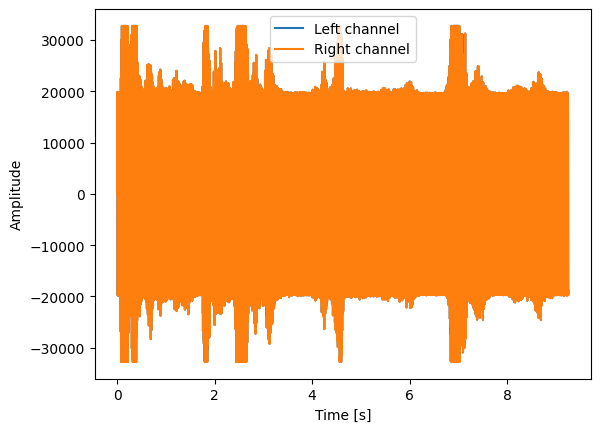

In [219]:
# Specify the path to your WAV file
file_path = 'speech_three-tones.wav'

# Read the WAV file
samplerate , data = wavfile.read(file_path)

print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")
print(f"dtypr = {data.dtype}")

data_l = data[:, 0]
data_r = data[:, 1]

time = np.linspace(0., length, data.shape[0])
plt.plot(time,data_l , label="Left channel")
plt.plot(time, data_r , label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

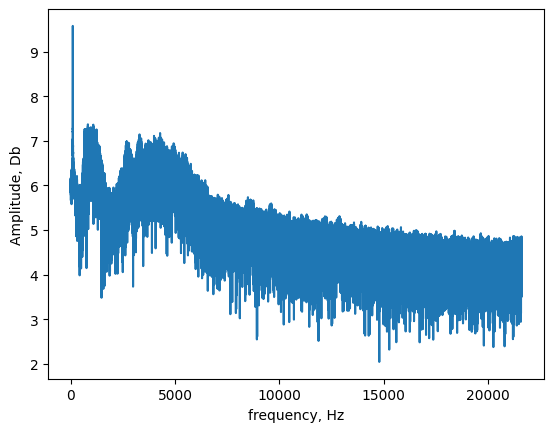

In [185]:
fft_spectrum = np.fft.rfft(data_l)
freq = np.fft.rfftfreq(data_l.size, d=1./samplerate)
fft_spectrum_abs = np.abs(fft_spectrum)

plt.plot(freq[0:200000], np.log10(fft_spectrum_abs[0:200000]))
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, Db")
plt.show()

In [ ]:
from scipy.signal import butter , lfilter , firwin

lowcut = 500.0
highcut = 2000.0
FRAME_RATE = 44100

def butter_bandpass(lowcut, highcut, fs, order=20):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=20):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def bandpass_filter(buffer):
    return butter_bandpass_filter(buffer, lowcut, highcut, FRAME_RATE, order=6)

assert samplerate == FRAME_RATE
filtered = np.apply_along_axis(bandpass_filter, 0, data).astype('int16')
wavfile.write('filtered_butter.wav', samplerate, filtered)




number of channels = 2
length = 9.258004535147393s


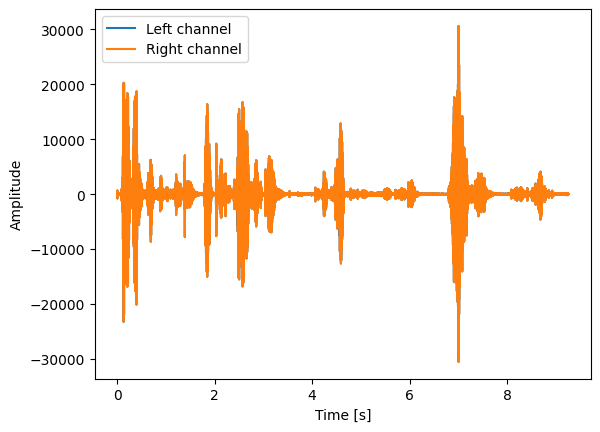

In [ ]:
# Specify the path to your WAV file
file_path = 'filtered_butter.wav'

# Read the WAV file

samplerate , data = wavfile.read(file_path)

print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")

time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

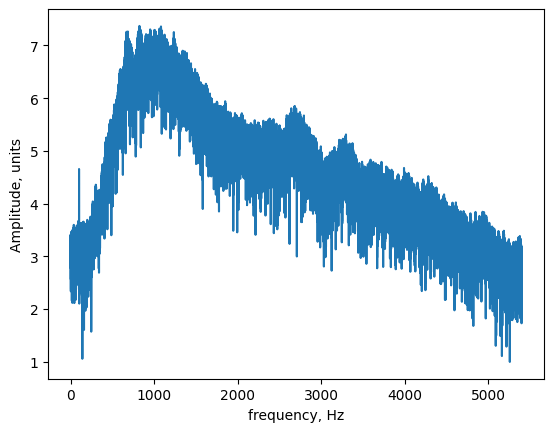

In [180]:
fft_spectrum = np.fft.rfft(data[:, 0])
freq = np.fft.rfftfreq(data[:, 0].size, d=1./samplerate)
fft_spectrum_abs = np.abs(fft_spectrum)

plt.plot(freq[0:50000], np.log10(fft_spectrum_abs[0:50000]))
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

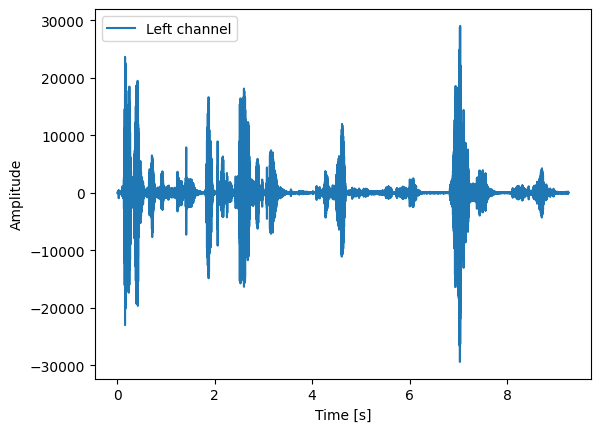

In [234]:
from scipy.signal import kaiserord, lfilter, firwin, freqz

f1, f2 = 500, 2000

taps = firwin(2560, [f1, f2], pass_zero=False,fs=samplerate)

res = freqz(taps,1.0)

# Use lfilter to filter x with the FIR filter.
filtered_FIR = lfilter(taps, 1.0, data_l)

wavfile.write('filtered_FIR.wav', samplerate, filtered_FIR.astype(np.int16))

plt.plot(time, filtered_FIR, label="Left channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()



In [1]:
fft_spectrum = np.fft.rfft(filtered_FIR)
freq = np.fft.rfftfreq(filtered_FIR.size, d=1./samplerate)
fft_spectrum_abs = np.abs(fft_spectrum)

plt.plot(freq[0:50000], np.log10(fft_spectrum_abs[0:50000]))
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, Db")
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\vicoj\Documents\Github\Signal_filter_Lab\venv_filter\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
  File "C:\Users\vicoj\AppData\Local\Temp\ipykernel_11436\2480540610.py", line 1, in <module>
    fft_spectrum = np.fft.rfft(filtered_FIR)
                   ^^
NameError: name 'np' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\vicoj\Documents\Github\Signal_filter_Lab\venv_filter\Lib\site-packages\pygments\styles\__init__.py", line 90, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\vicoj\Documents\Github\Signal_filter_Lab\venv_filter\Lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
  File "c:\Users\vicoj\Documents\Github\Signal_fil